In [1]:
# Load packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    precision_score,
    recall_score,
    RocCurveDisplay,
)
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler

In [2]:
# Load the data

df = pd.read_csv('Customer_Churn_Data.csv')
df.head()

,Call Failure,Complaints,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
0,8,0,38,0,4370,71,5,17,3,1,1,30,197.640,0
1,0,0,39,0,318,5,7,4,2,1,2,25,46.035,0
2,10,0,37,0,2453,60,359,24,3,1,1,30,1536.520,0
3,10,0,38,0,4198,66,1,35,1,1,1,15,240.020,0
4,3,0,38,0,2393,58,2,33,1,1,1,15,145.805,0


In [3]:
df.shape

(1428, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1428 entries, 0 to 1427
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Call Failure             1428 non-null   int64  
 1   Complaints               1428 non-null   int64  
 2   Subscription Length      1428 non-null   int64  
 3   Charge Amount            1428 non-null   int64  
 4   Seconds of Use           1428 non-null   int64  
 5   Frequency of use         1428 non-null   int64  
 6   Frequency of SMS         1428 non-null   int64  
 7   Distinct Called Numbers  1428 non-null   int64  
 8   Age Group                1428 non-null   int64  
 9   Tariff Plan              1428 non-null   int64  
 10  Status                   1428 non-null   int64  
 11  Age                      1428 non-null   int64  
 12  Customer Value           1428 non-null   float64
 13  Churn                    1428 non-null   int64  
dtypes: float64(1), int64(13)

In [5]:
df.isnull().sum()

Call Failure               0
Complaints                 0
Subscription Length        0
Charge Amount              0
Seconds of Use             0
Frequency of use           0
Frequency of SMS           0
Distinct Called Numbers    0
Age Group                  0
Tariff Plan                0
Status                     0
Age                        0
Customer Value             0
Churn                      0
dtype: int64

In [6]:
# Split the data into two DataFrames: X (features) and y (target variable)

X = df.iloc[:, 0:13]  # Specify at least one column as a feature
y = df["Churn"]  # Specify one column as the target variable

In [8]:
# Split the data into train and test subsets
# Adjust the test size and random state

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=12
)

In [9]:
# Standardize X data based on X_train

sc = StandardScaler().fit(X_train)
X_train_scaled = sc.transform(X_train)
X_test_scaled = sc.transform(X_test)

In [11]:
# Building a Logistic Regression Classifier

from sklearn import preprocessing

# Define parameters: these will need to be tuned to prevent overfitting and underfitting
params = {
    "penalty": "l2",  # Norm of the penalty: 'l1', 'l2', 'elasticnet', 'none'
    "C": 1,  # Inverse of regularization strength, a positive float
    "random_state": 12,
}

In [12]:
# Create a logistic regression classifier object with the parameters above

clf = LogisticRegression(**params)

In [13]:
# Train the classifer on the train set

clf = clf.fit(X_train_scaled, y_train)

In [14]:
# Predict the outcomes on the test set

y_pred = clf.predict(X_test_scaled)

In [15]:
y_pred

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
      dtype=int64)

In [17]:
# To evaluate this classifier, we can calculate the accuracy, precision, and recall scores. You'll have to decide which performance metric is best suited for your problem and goal.

# Calculate the accuracy, precision, and recall scores

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))

Accuracy: 0.8916083916083916
Precision: 0.896551724137931
Recall: 0.48148148148148145


Text(0.5, 23.52222222222222, 'Predicted label')

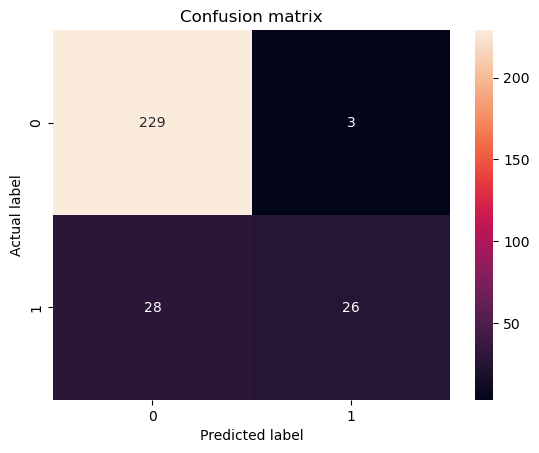

In [18]:
## Other evaluation methods

# Calculate confusion matrix

cnf_matrix = confusion_matrix(y_test, y_pred)

# Plot a labeled confusion matrix with Seaborn

sns.heatmap(cnf_matrix, annot=True, fmt="g")
plt.title("Confusion matrix")
plt.ylabel("Actual label")
plt.xlabel("Predicted label")

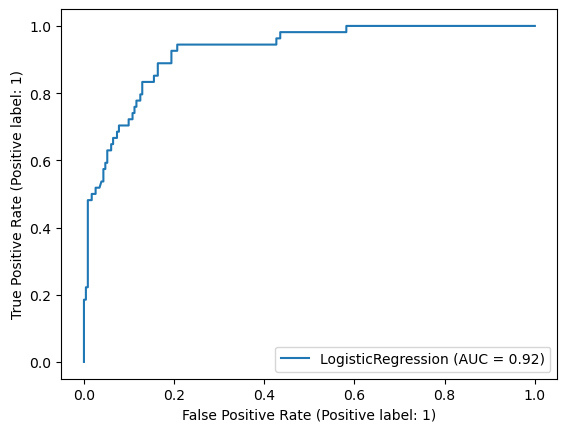

In [20]:
# Plot ROC curve

RocCurveDisplay.from_estimator(clf, X_test_scaled, y_test)